In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imputation3 as imp

In [30]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [31]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)

In [32]:
def is_nan(x):
    if type(x) == float:
        if np.isnan(x):
            return True
        else:
            return False

def LabelEncoding(data):
    k = data.unique()
    nlabel = {}
    for i, label in enumerate(k):
        if not is_nan(label):
            nlabel[label] = i#f'{i}'
    return nlabel

def categoricalData(data, list):
    labels = {}
    for i in list:
        if i != 'Key':
            labels[i] = LabelEncoding(data[i])
    return labels

def getDatasetReady(data):
    categoryList = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']
    # data.loc[data['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']
    data.set_index('id', inplace= True)
    data.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)



    labels = categoricalData(data, categoryList)

    for i in categoryList:
        if i != 'Key':
            data[i] = data[i].replace(labels[i])
    return data


In [33]:
trainProcess = getDatasetReady(train)

In [34]:
trainProcess

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,,,
0,0.0,0.000273,3.0,-25.176,0.0443,7.241508e-01,0.000062,0.000807,0.3400,83.398,117907.0,NaN,137622.0,19981370.0,0.0,0.0,3070.0,0.0,NaN
1,0.0,0.184220,7.0,NaN,NaN,6.722214e-01,0.910000,0.034966,0.7460,148.692,173427.0,184825.0,5190.0,NaN,NaN,0.0,122.0,1.0,1.0
2,0.0,NaN,6.0,-15.596,NaN,6.676276e-01,0.867000,0.001772,0.3800,84.899,150667.0,184825.0,5190.0,19320810.0,NaN,0.0,122.0,1.0,1.0
3,1.0,0.209585,NaN,-6.251,0.0277,3.796416e-03,NaN,0.001000,NaN,150.220,265000.0,202457327.0,997035.0,399661898.0,0.0,1.0,24350.0,2.0,2.0
4,4.0,NaN,5.0,NaN,0.0260,3.048625e-06,0.000467,0.002924,0.2950,97.997,263867.0,316688049.0,1299086.0,NaN,0.0,1.0,31150.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,3.0,0.794023,5.0,-6.344,0.0328,8.991539e-02,0.000000,0.000591,0.6580,90.002,94667.0,NaN,1113.0,NaN,NaN,1823.0,0.0,5190.0,1.0
17166,2.0,0.820026,4.0,-1.786,NaN,2.195200e-05,0.000000,0.000786,0.6570,174.869,150857.0,164741.0,2019.0,10898176.0,2.0,1823.0,0.0,5190.0,3.0
17167,1.0,0.571787,4.0,-4.679,0.0647,NaN,0.000000,0.003652,0.4190,168.388,136842.0,35646.0,329.0,NaN,2.0,1823.0,0.0,NaN,4.0


In [35]:
trainImputCopy = trainProcess.copy()
trainY = trainImputCopy['Danceability']
trainImputCopy = trainImputCopy.drop(columns=['Danceability'], axis=1)

In [36]:
impute = imp.testImputate(trainImputCopy)

In [37]:
impute.loadPredictions()
trainInputed  = impute.miceTrainedModel(trainImputCopy, savePredictions=True)

___ Processing Energy ___
___ Processing Key ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Tempo ___
___ Processing Duration_ms ___
___ Processing Views ___
___ Processing Likes ___
___ Processing Stream ___
___ Processing Album_type ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Url_spotify ___
___ Processing Comments ___
___ Processing Channel ___
___ Processing Composer ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

-- Imputation Done --


In [38]:
trainInputed

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,,
0,0.000273,3.0,-25.176000,0.044300,7.241508e-01,0.000062,0.000807,0.340000,83.398,117907.0,2.419411e+07,1.376220e+05,1.998137e+07,0.0,0.000000,3070.0,0.000000,9.0
1,0.184220,7.0,-13.065174,0.264156,6.722214e-01,0.910000,0.034966,0.746000,148.692,173427.0,1.848250e+05,5.190000e+03,8.965657e+07,3.0,0.000000,122.0,1.000000,1.0
2,0.416055,6.0,-15.596000,0.247164,6.676276e-01,0.867000,0.001772,0.380000,84.899,150667.0,1.848250e+05,5.190000e+03,1.932081e+07,3.0,0.000000,122.0,1.000000,1.0
3,0.209585,3.0,-6.251000,0.027700,3.796416e-03,0.155723,0.001000,0.464492,150.220,265000.0,2.024573e+08,9.970350e+05,3.996619e+08,0.0,1.000000,24350.0,2.000000,2.0
4,0.437961,5.0,-9.230150,0.026000,3.048625e-06,0.000467,0.002924,0.295000,97.997,263867.0,3.166880e+08,1.299086e+06,2.128747e+08,0.0,1.000000,31150.0,2.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,0.794023,5.0,-6.344000,0.032800,8.991539e-02,0.000000,0.000591,0.658000,90.002,94667.0,8.094088e+06,1.113000e+03,6.877551e+07,3.0,1823.000000,0.0,5190.000000,1.0
17166,0.820026,4.0,-1.786000,0.119218,2.195200e-05,0.000000,0.000786,0.657000,174.869,150857.0,1.647410e+05,2.019000e+03,1.089818e+07,2.0,1823.000000,0.0,5190.000000,3.0
17167,0.571787,4.0,-4.679000,0.064700,2.420526e-01,0.000000,0.003652,0.419000,168.388,136842.0,3.564600e+04,3.290000e+02,5.843464e+07,2.0,1823.000000,0.0,1779.552716,4.0


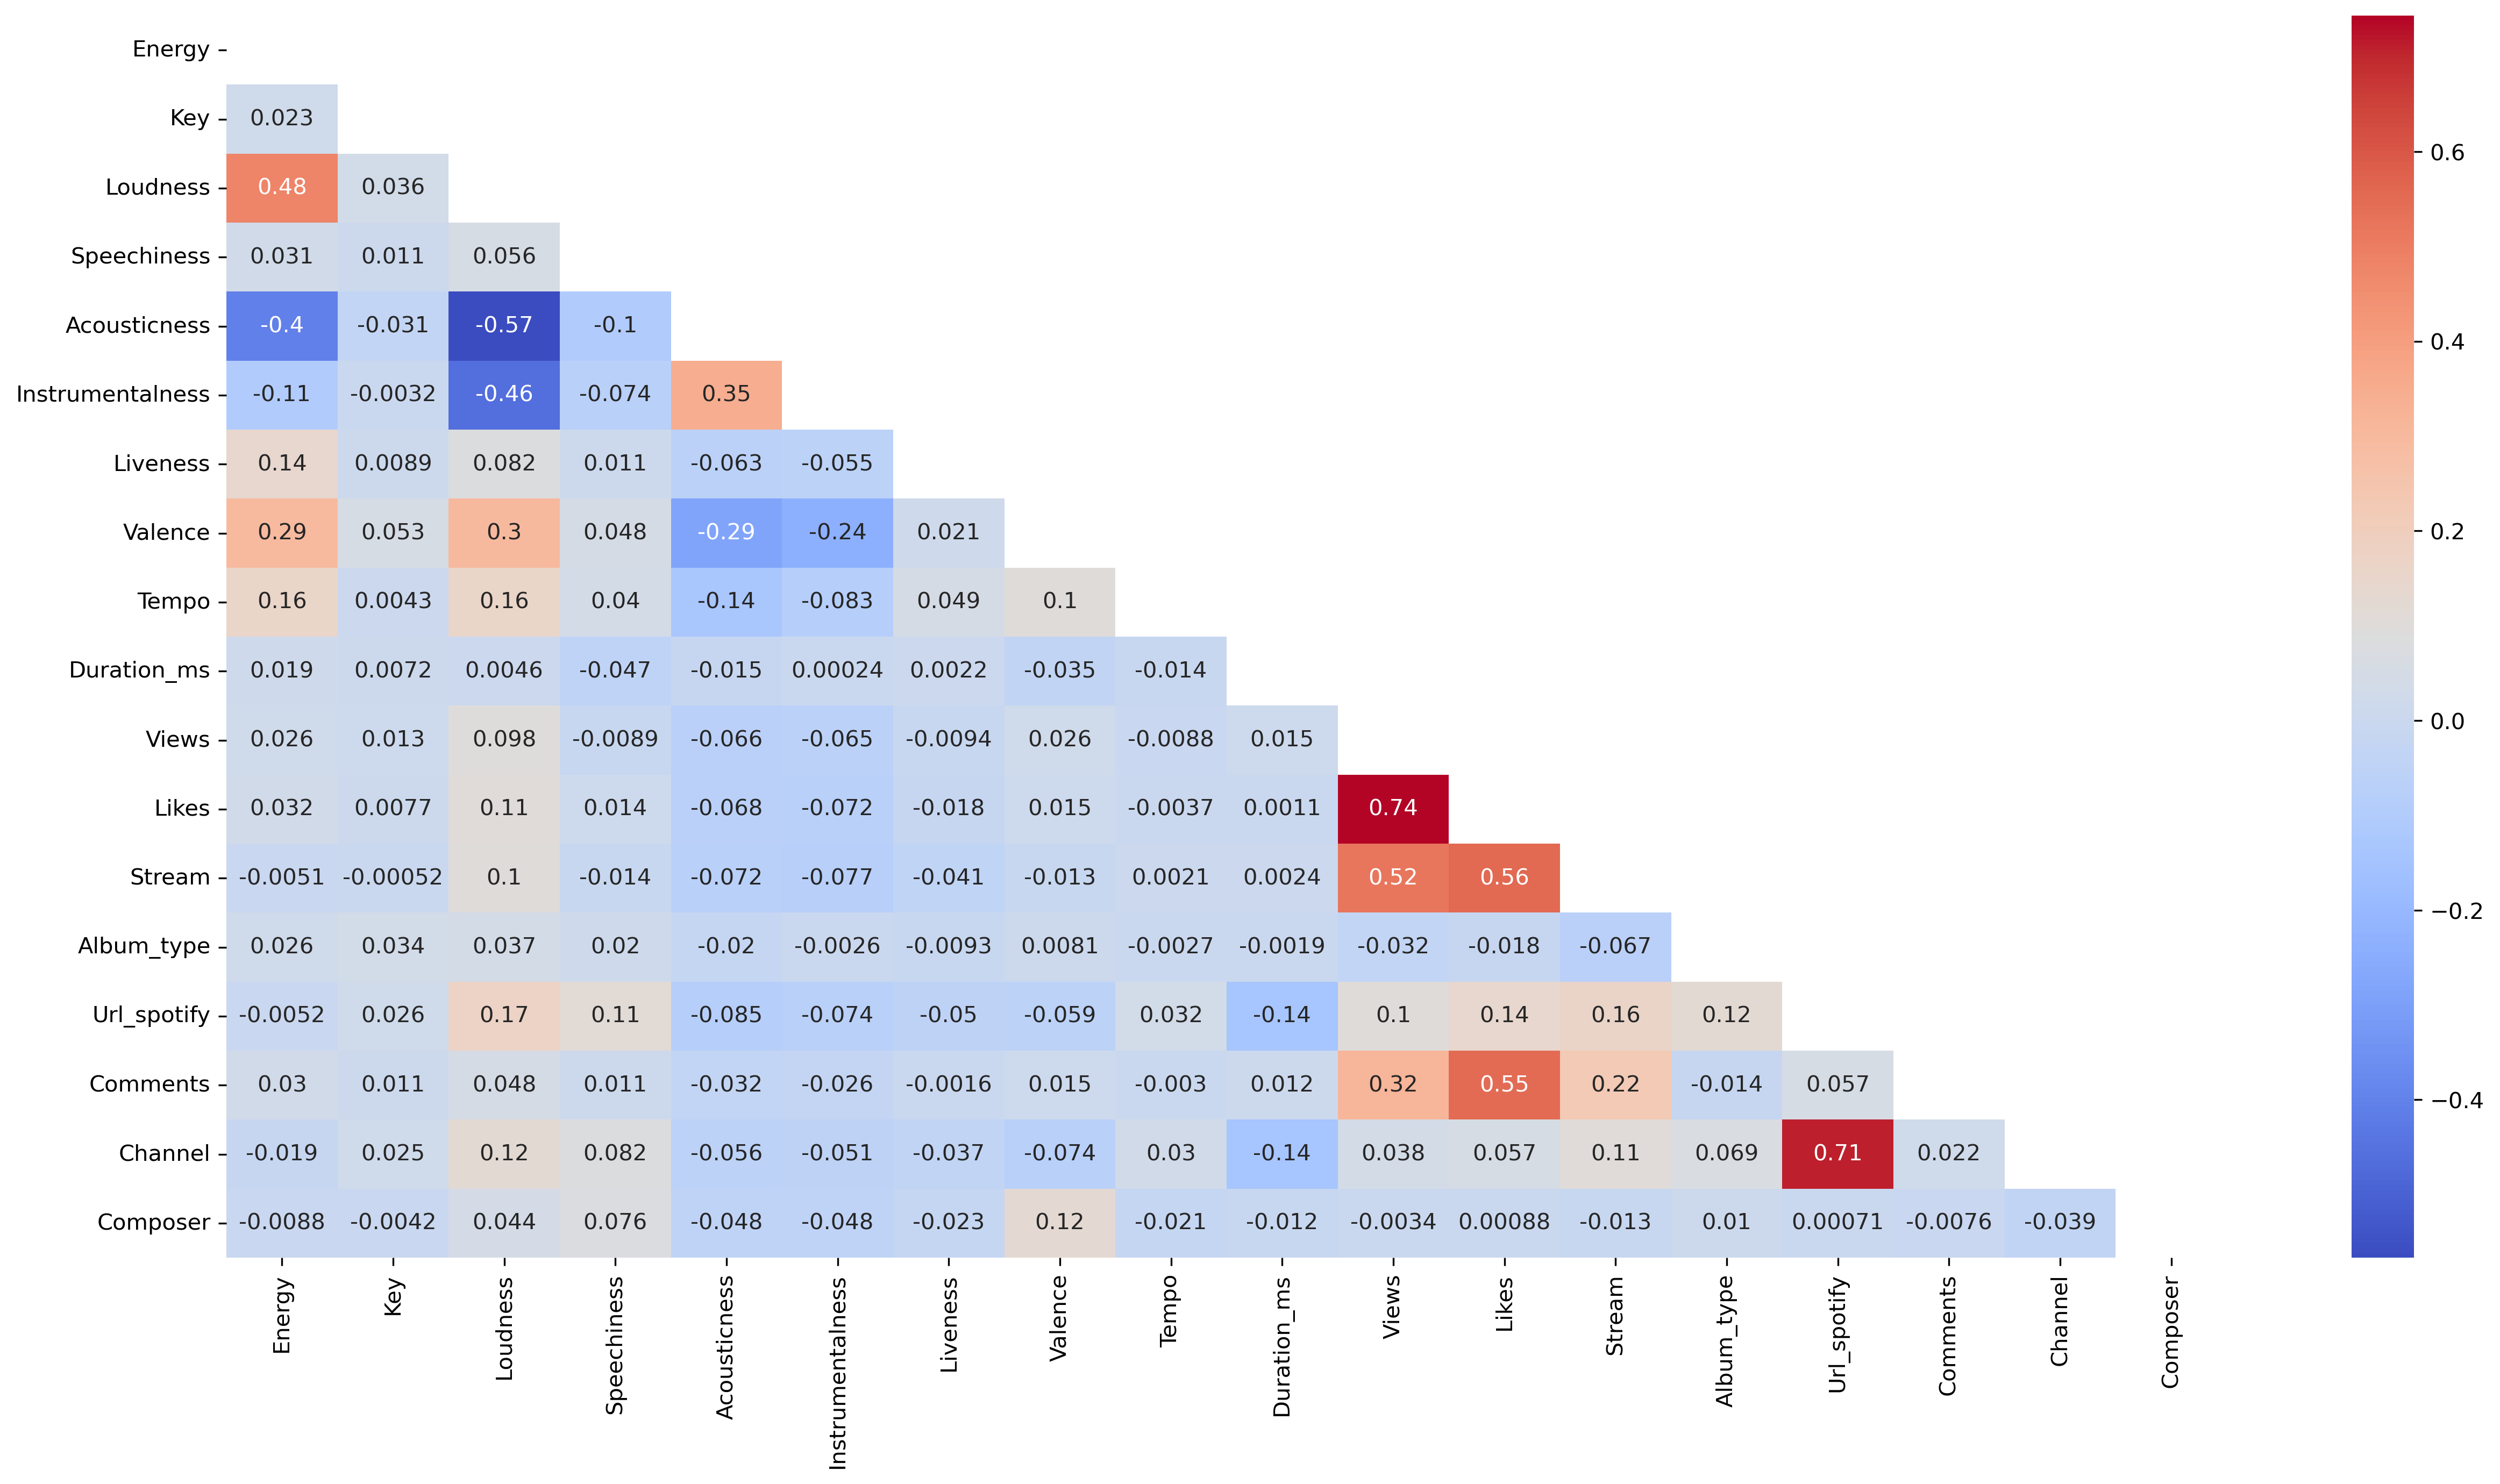

In [39]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(trainInputed.corr()))
dataplot = sns.heatmap(trainInputed.corr(), cmap="coolwarm", annot=True, mask=mask)

PREPROCESSING 

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledData = scaler.fit_transform(trainInputed)
scaledDataPD = pd.DataFrame(scaledData, columns=trainInputed.columns)

SHUFFLE DATA

In [41]:
# from sklearn.model_selection import train_test_split
# X_train, X_Validation, y_train, y_Validation = train_test_split(scaledDataPD, trainY, test_size=0.2, random_state=42)

In [42]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(scaledDataPD, trainY)

GET READY TEST DATA

In [43]:
testProcess = getDatasetReady(test)

In [44]:
testInputed  = impute.miceTrainedModel(testProcess, savePredictions=True)

___ Processing Energy ___
___ Processing Key ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___
___ Processing Tempo ___
___ Processing Duration_ms ___
___ Processing Views ___
___ Processing Likes ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Stream ___
___ Processing Album_type ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Url_spotify ___
___ Processing Comments ___
___ Processing Channel ___
___ Processing Composer ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

-- Imputation Done --


In [45]:
partialAnswer=  partialAnswer.set_index('id')

In [46]:
partialAnswer.index

Int64Index([18871, 18872, 18873, 18879, 18882, 18886, 18887, 18894, 18896,
            18899,
            ...
            23405, 23421, 23434, 23436, 23442, 23462, 23463, 23473, 23482,
            23484],
           dtype='int64', name='id', length=631)

In [47]:
testInputedData = testInputed.copy()

In [48]:
testInputedData = testInputedData.loc[partialAnswer.index, :]

In [49]:
scaledTestData = scaler.transform(testInputedData)
scaledTestDataPD = pd.DataFrame(scaledTestData, columns=testInputedData.columns)
scaledTestDataPD = scaledTestDataPD.set_index(partialAnswer.index)

In [50]:
X_test = scaledTestDataPD
y_test = partialAnswer

X_Validation = X_test
y_Validation = y_test

TEST MODELS

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def printErrors(y, y_hat):
    acc = accuracy_score(y, y_hat)
    mae = mean_absolute_error(y, y_hat)
    mse = mean_squared_error(y, y_hat)

    print(f'ACC: {acc * 100}, MAE:{mae}, MSE:{mse}')

# ENSEMBLE

In [72]:
totaltest = testInputed.copy()
scaledData = scaler.transform(totaltest)
totaltest_X = pd.DataFrame(scaledData, columns=trainInputed.columns)
totaltest_X = totaltest_X.set_index(totaltest.index)

In [73]:
totaltest_X

,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,,
17170,0.058119,0.229297,0.301412,0.804902,-0.621822,-0.381492,1.500769,0.059522,0.727208,-0.088284,2.618302,3.456501,3.985984,-0.769282,-1.917840,0.685229,-1.787264,-1.497611
17171,0.044897,0.793908,0.492138,-0.716117,0.679869,-0.390509,-0.451463,1.421548,-0.844728,-0.282983,-0.038921,-0.043523,0.752086,-0.769282,-1.917840,-0.013987,-1.787264,-1.132610
17172,1.996314,-1.182230,0.908248,-0.488171,-0.621459,0.628777,-0.439070,0.106795,-0.321195,-0.153193,-0.310724,-0.258617,-0.341987,0.862312,-1.917840,-0.132804,-1.787264,-1.132610
17173,0.294568,-0.899925,0.493242,-0.759633,-0.621825,2.398940,-0.450082,0.224729,0.104721,0.009009,0.127647,0.683767,1.303860,-0.769282,-1.917840,0.107962,-1.787264,-0.767608
17174,-0.013674,1.076214,-0.128605,0.742735,-0.621748,-0.394279,-0.449421,-0.006772,1.736105,0.936731,2.297345,3.441752,2.112593,-0.769282,0.248492,0.614872,-1.787264,-0.402607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,-0.786759,0.511603,0.370309,-0.558100,0.894489,-0.361266,-0.438380,-1.599969,-1.552616,0.007752,-0.305586,-0.398785,-0.543789,-0.769282,1.502739,-0.169204,-1.173973,0.692397
23481,-0.083348,1.358519,0.860000,-0.272656,-0.586412,-0.389794,-0.377330,0.383576,-0.718556,-0.815480,-0.151287,-0.389901,-0.560817,0.862312,1.362167,-0.167794,0.051214,-0.037606
23482,0.395226,-0.053008,0.493784,-0.273634,2.536445,4.535330,-0.446689,-1.918707,-1.009196,-0.407175,-0.361542,-0.420696,-0.539402,0.862312,-1.685591,0.233969,0.051912,1.057399


Predictions Results Total Data

In [53]:
predictTest = pd.DataFrame()
predictionResults = pd.DataFrame()

### 1st MODEL

In [54]:
categories = len(y_test['Danceability'].unique())
# For XGBRegressor parameters
xboost_param = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'eval_metric': "mlogloss",
    'num_class': categories,
    'learning_rate': 0.3,#2.3e-4,
    'max_depth': 15,
    'min_child_weight': 10,
    'verbosity': 0
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
xboostModel = xgb.train(xboost_param, dtrain, num_boost_round=1500, early_stopping_rounds=10, evals=[(dtrain, 'train'), (dValidation, 'validation')])

dtest = xgb.DMatrix(X_test)
y_pred = xboostModel.predict(dtest, ntree_limit=xboostModel.best_iteration+1)

printErrors(y_test, y_pred)

dtestTotal = xgb.DMatrix(totaltest_X)
xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)

predictTest['XBoost'] = y_pred
predictionResults['XBoost'] = xboostPred


[0]	train-mlogloss:2.10502	validation-mlogloss:2.28547
[1]	train-mlogloss:1.95488	validation-mlogloss:2.28317
[2]	train-mlogloss:1.82651	validation-mlogloss:2.28447
[3]	train-mlogloss:1.71472	validation-mlogloss:2.29006
[4]	train-mlogloss:1.61937	validation-mlogloss:2.30024
[5]	train-mlogloss:1.53174	validation-mlogloss:2.31211
[6]	train-mlogloss:1.45569	validation-mlogloss:2.32106
[7]	train-mlogloss:1.38327	validation-mlogloss:2.33494
[8]	train-mlogloss:1.32442	validation-mlogloss:2.34323
[9]	train-mlogloss:1.27468	validation-mlogloss:2.34996
[10]	train-mlogloss:1.21937	validation-mlogloss:2.35969
[11]	train-mlogloss:1.16825	validation-mlogloss:2.36861
ACC: 13.153724247226625, MAE:2.906497622820919, MSE:13.530903328050712


c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


### 2do Model

In [55]:
categories = len(y_test['Danceability'].unique())
lightParams1 = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'random_forest',
    "max_depth": 6,
    "num_leaves": 50,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
gbm = lgb.train(lightParams1,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
y_predTotal = predTotal.argmax(axis=1)

predictTest['lightGBM1'] = y_pred
predictionResults['lightGBM1'] = y_predTotal

[LightGBM] [Info] Number of positive: 1655, number of negative: 15515
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1664, number of negative: 15506
[LightGBM] [Info] Number of positive: 1675, number of negative: 15495
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1702, number of negative: 15468
[LightGBM] [Info] Number of positive: 1856, number of negative: 15314
[LightGBM] [Info] Number of positive: 1826, number of negative: 15344
[LightGBM] [Info] Number of positive: 1860, number of negative: 15310
[LightGBM] [Info] Number of positive: 1654, number of negative: 15516
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3853
[LightGBM] [Info] Number of data points in the train set: 17170, number of used features: 18
[LightGB

### 3rd Model

In [56]:
from sklearn.ensemble import RandomForestClassifier
randomForestClass = RandomForestClassifier()
randomForestClass.fit(X_train, y_train)

predVal = randomForestClass.predict(X_Validation)
printErrors(y_Validation, predVal)

predTest = randomForestClass.predict(X_test)
printErrors(y_test, predTest)

predTestTotal = randomForestClass.predict(totaltest_X)

predictTest['RandomForestClassifier'] = predTest
predictionResults['RandomForestClassifier'] = predTestTotal

ACC: 13.629160063391444, MAE:2.9302694136291603, MSE:13.751188589540412
ACC: 13.629160063391444, MAE:2.9302694136291603, MSE:13.751188589540412


### 4to Model

In [57]:
params = {
    'objective': 'multiclass',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":2.3e-4,
    "feature_fraction":0.5,
    'lambda_l1':1e-2,
    "lambda_l2":1e-2,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
y_predTotal = predTotal.argmax(axis=1)


predictTest['lightGBM2'] = y_pred
predictionResults['lightGBM2'] = y_predTotal


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3853
[LightGBM] [Info] Number of data points in the train set: 17170, number of used features: 18
[LightGBM] [Info] Start training from score -2.339363
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.333939
[LightGBM] [Info] Start training from score -2.327351
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.311360
[LightGBM] [Info] Start training from score -2.224740
[LightGBM] [Info] Start training from score -2.241036
[LightGBM] [Info] Start training from score -2.222587
[LightGBM] [Info] Start training from score -2.339967
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4619]	valid_0's multi_logloss: 2.24466


-------  E

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
extraTress = ExtraTreesClassifier(n_estimators=100, random_state=0)
extraTress.fit(X_train, y_train)
predTestTress = extraTress.predict(X_test)
printErrors(y_test, predTestTress)


y_predTotalTress = extraTress.predict(totaltest_X)


predictTest['ExtraTreesClassifier1'] = predTestTress
predictionResults['ExtraTreesClassifier1'] = y_predTotalTress

ACC: 15.530903328050712, MAE:2.8066561014263076, MSE:13.095087163232964


In [59]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import ExtraTreesClassifier
OneVsOneClassifierModel = OneVsOneClassifier(ExtraTreesClassifier(n_estimators=100, random_state=123), n_jobs=8)
OneVsOneClassifierModel.fit(X_train, y_train)
predTestOneVsOneClassifier = OneVsOneClassifierModel.predict(X_test)
printErrors(y_test, predTestOneVsOneClassifier)


y_predTotalOneVsOneClassifier = OneVsOneClassifierModel.predict(totaltest_X)


predictTest['predTestOneVsOneClassifier'] = predTestOneVsOneClassifier
predictionResults['predTotalOneVsOneClassifier'] = y_predTotalOneVsOneClassifier

ACC: 14.580031695721077, MAE:2.75594294770206, MSE:12.638668779714738


In [60]:
from sklearn.ensemble import RandomForestRegressor

randomForestregressor = RandomForestRegressor(n_estimators=1000)
randomForestregressor.fit(X_train, y_train)

predVal = randomForestregressor.predict(X_Validation)
predValInt = predVal.astype(int)
printErrors(y_Validation, predValInt)

predTest = randomForestregressor.predict(X_test)
predTestInt = predTest.astype(int)
printErrors(y_test, predTestInt)

y_predTotal = randomForestregressor.predict(totaltest_X)


predictTest['RandomForestRegressor1'] = predTest
predictionResults['RandomForestRegressor1'] = y_predTotal

ACC: 13.946117274167987, MAE:2.2567353407290014, MSE:7.822503961965134
ACC: 13.946117274167987, MAE:2.2567353407290014, MSE:7.822503961965134


In [61]:
params = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'gbdt',
    "max_depth": 15,
    "num_leaves": 20,
    "bagging_fraction": 0.5,
    "bagging_freq": 5,
    "learning_rate":1e-2,
    "feature_fraction":0.5,
    'lambda_l1':1e-3,
    "lambda_l2":1e-2,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
y_predTotal = predTotal.argmax(axis=1)


predictTest['lightGBM3'] = y_pred
predictionResults['lightGBM3'] = y_predTotal

Starting training...
[LightGBM] [Info] Number of positive: 1655, number of negative: 15515
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1664, number of negative: 15506
[LightGBM] [Info] Number of positive: 1675, number of negative: 15495
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1702, number of negative: 15468
[LightGBM] [Info] Number of positive: 1856, number of negative: 15314
[LightGBM] [Info] Number of positive: 1826, number of negative: 15344
[LightGBM] [Info] Number of positive: 1860, number of negative: 15310
[LightGBM] [Info] Number of positive: 1654, number of negative: 15516
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3853
[LightGBM] [Info] Number of data points in the train set: 17170, number of used 

In [62]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":2.3e-4,
    "feature_fraction":0.5,
    'lambda_l1':1e-2,
    "lambda_l2":1e-3,
    "verbosity":0
}


import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('\n\n-------  ERROR  ------ \n')


pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.astype(int)

printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)



predictTest['lightgbm5'] = pred
predictionResults['lightgbm5'] = predTotal



Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001166 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4927]	valid_0's rmse: 2.64572


-------  ERROR  ------ 

ACC: 12.836767036450079, MAE:2.26148969889065, MSE:7.459587955625991

-------  ERROR  ------ 



In [63]:

default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
xboostModel = xgb.train(default_params, dtrain, num_boost_round=1500, early_stopping_rounds=10, evals=[(dtrain, 'train'), (dValidation, 'validation')])

dtest = xgb.DMatrix(X_test)
y_pred = xboostModel.predict(dtest, ntree_limit=xboostModel.best_iteration+1)
y_predInt = np.round(y_pred)

printErrors(y_test, y_predInt)

dtestTotal = xgb.DMatrix(totaltest_X)
xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)

predictTest['XBoost2'] = y_pred
predictionResults['XBoost2'] = xboostPred


[0]	train-rmse:4.61746	validation-rmse:4.59046
[1]	train-rmse:4.29417	validation-rmse:4.29506
[2]	train-rmse:4.01130	validation-rmse:4.04789
[3]	train-rmse:3.76498	validation-rmse:3.83066
[4]	train-rmse:3.55099	validation-rmse:3.64374
[5]	train-rmse:3.36538	validation-rmse:3.49185
[6]	train-rmse:3.20408	validation-rmse:3.37259
[7]	train-rmse:3.06527	validation-rmse:3.26024
[8]	train-rmse:2.94297	validation-rmse:3.16159
[9]	train-rmse:2.83985	validation-rmse:3.07342
[10]	train-rmse:2.75059	validation-rmse:3.00359
[11]	train-rmse:2.67404	validation-rmse:2.95120
[12]	train-rmse:2.60576	validation-rmse:2.90250
[13]	train-rmse:2.55040	validation-rmse:2.86352
[14]	train-rmse:2.49942	validation-rmse:2.83060
[15]	train-rmse:2.45789	validation-rmse:2.80893
[16]	train-rmse:2.42101	validation-rmse:2.78545
[17]	train-rmse:2.38908	validation-rmse:2.76600
[18]	train-rmse:2.36211	validation-rmse:2.74707
[19]	train-rmse:2.33643	validation-rmse:2.72729
[20]	train-rmse:2.31341	validation-rmse:2.71955
[2

c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [68]:
copyPredictTest = predictTest.copy()
ErrorsPD = pd.DataFrame()

ErrorsPD['Mean'] = copyPredictTest.mean(axis=1)
ErrorsPD['Median'] = copyPredictTest.median(axis=1)
ErrorsPD['Max'] = copyPredictTest.max(axis=1)
# copyPredictTest['Median'] = copyPredictTest.median(axis=1).astype(int)
copyPredictTest = copyPredictTest.set_index(y_test.index)
ErrorsPD = ErrorsPD.set_index(y_test.index)
print("-----MEDIAN-----")
printErrors(y_test, np.round(ErrorsPD['Median']))
print("-----MEAN-----")
printErrors(y_test, np.round(ErrorsPD['Mean']))
print("-----MAX-----")
printErrors(y_test, np.round(ErrorsPD['Max']))

ErrorsPD['Y']=y_test

-----MEDIAN-----
ACC: 15.055467511885896, MAE:2.554675118858954, MSE:10.73217115689382
-----MEAN-----
ACC: 12.678288431061807, MAE:2.4152139461172744, MSE:9.258320126782884
-----MAX-----
ACC: 12.202852614896988, MAE:2.936608557844691, MSE:13.450079239302694


In [65]:
copyPredictTest

,XBoost,lightGBM1,RandomForestClassifier,lightGBM2,ExtraTreesClassifier1,predTestOneVsOneClassifier,RandomForestRegressor1,lightGBM3,lightgbm5,XBoost2
id,,,,,,,,,,
18871,6.0,8,7.0,7,5.0,7.0,6.063,7,5.161537,5.558835
18872,8.0,7,8.0,8,6.0,8.0,6.977,7,5.483292,6.511001
18873,9.0,9,1.0,9,8.0,9.0,6.119,9,5.082251,5.597377
18879,7.0,7,2.0,3,3.0,3.0,3.648,3,4.496365,4.551960
18882,5.0,6,7.0,6,1.0,1.0,4.016,6,4.318641,3.851903
...,...,...,...,...,...,...,...,...,...,...
23462,3.0,6,4.0,6,7.0,3.0,4.440,6,4.688851,4.862783
23463,9.0,9,8.0,6,7.0,7.0,5.896,8,5.023320,5.376875
23473,0.0,0,1.0,0,0.0,2.0,3.564,0,4.140583,3.563754


In [66]:
ErrorsPD

,Mean,Median,Max,Y
id,,,,
18871,6.378337,6.531500,8.000000,9.0
18872,7.097129,7.000000,8.000000,9.0
18873,7.079863,8.500000,9.000000,8.0
18879,4.069632,3.324000,7.000000,8.0
18882,4.418654,4.659320,7.000000,8.0
...,...,...,...,...
23462,4.899163,4.775817,7.000000,4.0
23463,7.029620,7.000000,9.000000,7.0
23473,1.426834,0.500000,4.140583,5.0


In [67]:
predictionResults

,XBoost,lightGBM1,RandomForestClassifier,lightGBM2,ExtraTreesClassifier1,predTotalOneVsOneClassifier,RandomForestRegressor1,lightGBM3,lightgbm5,XBoost2
0,7.0,7,4.0,7,4.0,3.0,4.968,7,4.886637,4.991685
1,6.0,4,8.0,4,8.0,6.0,6.158,6,5.156768,5.516484
2,6.0,6,4.0,6,6.0,4.0,4.685,6,4.469166,4.547799
3,5.0,4,6.0,4,7.0,5.0,4.402,4,3.892813,3.602159
4,8.0,8,3.0,3,3.0,3.0,5.253,8,4.621783,4.557559
...,...,...,...,...,...,...,...,...,...,...
6310,4.0,1,0.0,0,0.0,3.0,3.023,0,3.620522,2.942064
6311,7.0,9,7.0,8,9.0,6.0,6.867,8,5.524912,6.238356
6312,4.0,9,0.0,0,0.0,0.0,3.637,0,4.025672,3.373677
6313,1.0,6,6.0,6,5.0,5.0,4.162,6,4.671308,4.337459


In [74]:
copypredictionResults = predictionResults.copy()
ErrorsPDTotal = pd.DataFrame()

ErrorsPDTotal['Mean'] = copypredictionResults.mean(axis=1)
ErrorsPDTotal['Median'] = copypredictionResults.median(axis=1)
ErrorsPDTotal['Max'] = copypredictionResults.max(axis=1)
# copyPredictTest['Median'] = copyPredictTest.median(axis=1).astype(int)
copypredictionResults = copypredictionResults.set_index(totaltest_X.index)
ErrorsPDTotal = ErrorsPDTotal.set_index(totaltest_X.index)

In [75]:
ErrorsPDTotal

,Mean,Median,Max
id,,,
17170,5.384632,4.979842,7.0
17171,5.883125,6.000000,8.0
17172,5.170197,5.342500,6.0
17173,4.689697,4.201000,7.0
17174,5.043234,4.589671,8.0
...,...,...,...
23480,1.758559,1.971032,4.0
23481,7.263027,7.000000,9.0
23482,2.403635,1.686839,9.0


In [82]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

preds = np.round(ErrorsPDTotal['Median'])
# preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
# preds['id'] = preds.index + 17170
# preds = preds[['id', 'Danceability']]
# preds[preds['id']==18871]

In [91]:
t = pd.DataFrame(ErrorsPDTotal.index,  columns=['id'])

t['Danceability'] = np.round(ErrorsPDTotal['Median'].values)

In [92]:
t

,id,Danceability
0,17170,5.0
1,17171,6.0
2,17172,5.0
3,17173,4.0
4,17174,5.0
...,...,...
6310,23480,2.0
6311,23481,7.0
6312,23482,2.0
6313,23483,5.0


In [83]:
preds

,Danceability


In [93]:
t.to_csv('Test' + datetime_string + '.csv', index=False)


In [23]:
categories = len(y_test['Danceability'].unique())
params = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'random_forest',
    "max_depth": 6,
    "num_leaves": 128,
    "min_data_in_leaf": 1,
    "min_sum_hessian_in_leaf": 0.00001,
    "min_gain_to_split": 0.0,
    "bagging_fraction": 0.632,
    "feature_fraction": 1.0,
    "feature_fraction_bynode": 0.632,
    "bagging_freq": 5,
    "verbosity":0
}

In [24]:
import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[Li

In [25]:
pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

ACC: 14.263074484944532, MAE:3.096671949286846, MSE:15.328050713153724


In [101]:
# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.01,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1
}

In [102]:
import xgboost as xgb

# Create an XGBoost classifier
clf = xgb.XGBClassifier(**default_params)
# Train the classifier
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_Validation)


In [103]:
printErrors(y_Validation, y_pred)

ACC: 21.782178217821784, MAE:2.3008153756552128, MSE:10.027664531159


In [104]:
y_predReal = clf.predict(X_test)
printErrors(y_test, y_predReal)

ACC: 12.995245641838352, MAE:3.24405705229794, MSE:16.79714738510301


MODELO 

In [48]:
import lightgbm as lgb

class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)

In [49]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1
}

In [73]:
train_features = X
train_labels = y

val_features = scaledDataTestPD
val_labels = testImp_y


In [56]:
# ! pip install catboost

     -------------------------------------- 101.0/101.0 MB 4.8 MB/s eta 0:00:00


In [74]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from catboost import CatBoostRegressor

import pickle
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    CatBoostRegressor(iterations=1500, learning_rate=0.1, depth=3),
    #OneVsOneClassifier(AdaBoostClassifier(n_estimators=50, random_state=42), n_jobs=8),
    OneVsOneClassifier(ExtraTreesClassifier(), n_jobs=8), #this one works well
    #OneVsOneClassifier(XGBRegressor(**default_params), n_jobs=8),
    #OneVsOneClassifier(svm.SVC(kernel='linear'), n_jobs=8),    
    ExtraTreesClassifier(),
    #svm.SVC(kernel='rbf'),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])
all_preds = []

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    all_preds.append(pred)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: CatBoostRegressor
0:	learn: 2.7955963	total: 3.5ms	remaining: 5.25s
1:	learn: 2.7428830	total: 7.26ms	remaining: 5.44s
2:	learn: 2.6940921	total: 10.8ms	remaining: 5.4s
3:	learn: 2.6483353	total: 14.3ms	remaining: 5.34s
4:	learn: 2.6109882	total: 17.7ms	remaining: 5.3s
5:	learn: 2.5793755	total: 21.8ms	remaining: 5.44s
6:	learn: 2.5459427	total: 25.8ms	remaining: 5.5s
7:	learn: 2.5165606	total: 29.3ms	remaining: 5.47s
8:	learn: 2.4881321	total: 32.7ms	remaining: 5.42s
9:	learn: 2.4633133	total: 36.2ms	remaining: 5.4s
10:	learn: 2.4424690	total: 40.2ms	remaining: 5.44s
11:	learn: 2.4241447	total: 43.5ms	remaining: 5.4s
12:	learn: 2.4006361	total: 46.5ms	remaining: 5.32s
13:	learn: 2.3842209	total: 49.1ms	remaining: 5.21s
14:	

,mae,accuracy
regressors,,
DecisionTreeClassifier,2.866878,0.142631
ExtraTreesClassifier,2.694136,0.158479
LGBWrapper,2.231379,0.096672
RandomForestRegressor,2.228209,0.106181
RandomForestRegressor,2.210777,0.114105
XGBRegressor,2.202853,0.114105
CatBoostRegressor,2.201268,0.152139
OneVsOneClassifier,2.622821,0.171157
ExtraTreesClassifier,2.711569,0.156894


In [75]:
testImpTotal

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
17170,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,0.503058,138.559000,6.935552e+08,6.220896e+06,1.040235e+09,169907.000000,222640.000000,6.0,0.0,1824.0,1207.0,3.0
17171,0.347429,-5.815000,0.030200,3.225859e-02,0.000687,0.000099,0.852000,92.761000,7.201164e+07,8.461311e+05,3.100837e+08,31003.000000,200173.000000,8.0,0.0,1824.0,1207.0,1.0
17172,0.786330,-3.930000,0.052200,7.676563e-05,0.020704,0.001561,0.551000,108.014000,8.435055e+06,2.821420e+05,6.306347e+07,7399.000000,215150.000000,1.0,2.0,1824.0,1207.0,1.0
17173,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,2.333321e+08,1.788577e+06,4.346636e+08,55229.000000,233867.000000,2.0,0.0,1824.0,1207.0,5.0
17174,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,6.184810e+08,6.197318e+06,6.172597e+08,155930.000000,340920.000000,11.0,0.0,1223.0,1207.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.000000,233721.956648,7.0,0.0,209.0,2970.0,6.0
23481,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,118.522961,4.572846e+07,7.227992e+04,1.365601e+07,448.000000,138726.388393,10.0,2.0,1631.0,4731.0,7.0
23482,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,239750.159018,185842.047750,5.0,2.0,1937.0,5845.0,4.0


In [76]:
median_preds = np.median(all_preds, axis=0)
median_accuracy = accuracy_score(np.ravel(val_labels), np.rint(median_preds))
median_mae = mean_absolute_error(np.ravel(val_labels), np.rint(median_preds))

print("Median Accuracy:", median_accuracy)
print("Median MAE:", median_mae)
print("Median Accuracy:", accuracy_score(np.ravel(val_labels), np.rint(median_preds)))

Median Accuracy: 0.1109350237717908
Median MAE: 2.2091917591125196
Median Accuracy: 0.1109350237717908


In [77]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(result_table['mae']), "Error x MAE", (1-np.mean(result_table['accuracy'])) * np.mean(result_table['mae']))

Mean Accuracy 0.1347068145800317 Error 0.8652931854199684 MAE 2.441098784997359 Error x MAE 2.1122661435951793


In [78]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(result_table['mae']), "Error x MAE", (1-np.mean(result_table['accuracy'])) * np.mean(result_table['mae']))

Mean Accuracy 0.1347068145800317 Error 0.8652931854199684 MAE 2.441098784997359 Error x MAE 2.1122661435951793


In [79]:

# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        train_features,                # Full X data
        np.ravel(train_labels)       # Full Y label
    )

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: CatBoostRegressor
0:	learn: 2.7955963	total: 4.64ms	remaining: 6.96s
1:	learn: 2.7428830	total: 9.14ms	remaining: 6.85s
2:	learn: 2.6940921	total: 13.1ms	remaining: 6.55s
3:	learn: 2.6483353	total: 17.2ms	remaining: 6.43s
4:	learn: 2.6109882	total: 21.3ms	remaining: 6.38s
5:	learn: 2.5793755	total: 25.6ms	remaining: 6.37s
6:	learn: 2.5459427	total: 29.5ms	remaining: 6.29s
7:	learn: 2.5165606	total: 33.4ms	remaining: 6.24s
8:	learn: 2.4881321	total: 37.3ms	remaining: 6.18s
9:	learn: 2.4633133	total: 41.2ms	remaining: 6.13s
10:	learn: 2.4424690	total: 44.8ms	remaining: 6.07s
11:	learn: 2.4241447	total: 48.7ms	remaining: 6.04s
12:	learn: 2.4006361	total: 52.5ms	remaining: 6.01s
13:	learn: 2.3842209	total: 56.6ms	remaining: 6.01

In [80]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)
    median_predictions = np.median(predictions, axis=1)

    #return avg_predictions, predictions
    return median_predictions, predictions

# Make ensemble predictions to Validations
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, val_features)
accuracy = accuracy_score(np.ravel(val_labels), np.rint(ensemble_predictions_l1))
mae = mean_absolute_error(np.ravel(val_labels), np.rint(ensemble_predictions_l1))

print("Acc", accuracy, "Error", (1- accuracy), "MAE", mae, "Error x MAE", (1-accuracy) * mae)

Acc 0.1109350237717908 Error 0.8890649762282092 MAE 2.2091917591125196 Error x MAE 1.964115018798928


In [86]:
# Make ensemble predictions to Real TEST
ensemble_predictions_real, all_predictions = ensemble_predict(regressors, scaledTestFilePD)


In [89]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_real
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds[preds['id']==18871]

,id,Danceability
1701,18871,6
